House Price Prediction - Analysis

1)Load and Combine Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import re

# Load data files

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

EDA


In [ ]:
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [ ]:
#more info about data set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Drop the Id column as it’s useless for modeling
df_train.drop("Id", axis=1, inplace=True)
test_ID = df_test['Id'] # Save test IDs for submission
df_test.drop("Id", axis=1, inplace=True)

Combining the Data Sets

In [ ]:
# Combine datasets for consistent preprocessing (excluding the target variable)
y_train = df_train['SalePrice']
X_train = df_train.drop('SalePrice', axis=1)

# Combine X_train and df_test for feature engineering consistency
X_combined = pd.concat((X_train, df_test)).reset_index(drop=True)

print(f"Combined data shape: {X_combined.shape}")
print("-" * 40)

Combined data shape: (2919, 79)
----------------------------------------


## Target Variable Analysis & Log TransformTheory:,
 The Problem of Skewness and RMSESkewness (Stats): The SalePrice variable is almost always right-skewed (meaning the tail of the distribution extends to the right, and a few high-value outliers pull the average up). Linear models perform poorly when the target variable is not normally distributed.Log Transformation (Maths/Stats): Applying a $\log$ function pulls in the long tail, normalizing the distribution. We use the logarithm of the price ($\log(\text{SalePrice})$) for training.Root Mean Squared Error (RMSE): This is the key metric for regression. It measures the average magnitude of the errors. Since we train on the $\log(\text{SalePrice})$, we evaluate using Root Mean Squared Logarithmic Error (RMSLE), which penalizes large percentage errors more than large absolute dollar errors.

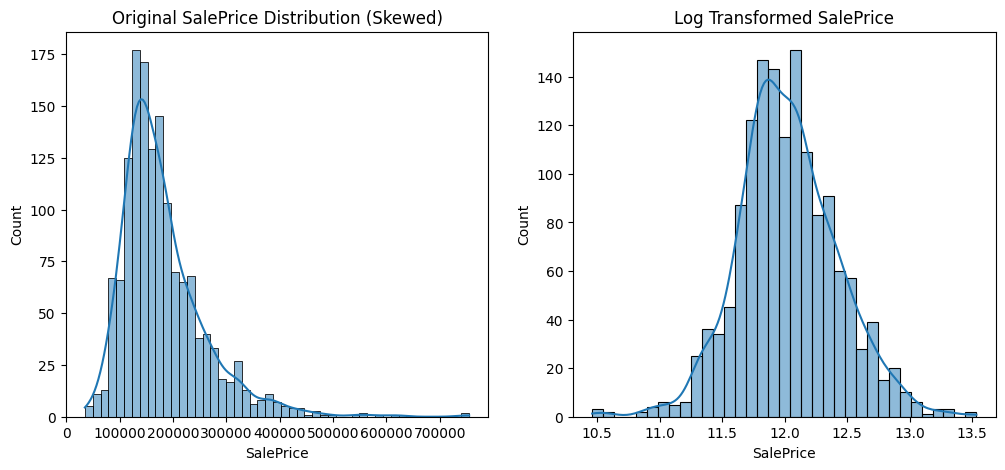

In [ ]:
# 1. Visualize the SalePrice distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True)
plt.title('Original SalePrice Distribution (Skewed)')

# 2. Apply Log Transform (Maths Skill)
y_train_log = np.log1p(y_train)

plt.subplot(1, 2, 2)
sns.histplot(y_train_log, kde=True)
plt.title('Log Transformed SalePrice')
plt.show() #

# Replace the skewed target with the corrected log-transformed target
y = y_train_log

## Feature Engineering: Handling Missing Values
Theory: Contextual Imputation Strategies
For house data, missing data often means "None," not "Unknown" or "Missing."

e.g., Missing GarageQual? This means No Garage. We fill the NA with the string 'None'.

e.g., Missing LotFrontage (numerical)? We might fill with the median of the neighborhood.

The 95% Rule (Analysing): Columns with excessive missing data (e.g., > 95% NA) are often too sparse to be useful and should be dropped.

In [ ]:
# 1. Handle features where NA means 'None' (categorical features)
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'MasVnrType'):
    X_combined[col] = X_combined[col].fillna('None')

# 2. Handle numerical features with median/mode imputation
# Numerical Features: fill with 0, median, or mode.
for col in ('GarageYrBlt', 'MasVnrArea'):
    # Fill numerical missing values with 0
    X_combined[col] = X_combined[col].fillna(0)

# LotFrontage: fill with the median of the entire column
X_combined['LotFrontage'] = X_combined['LotFrontage'].fillna(X_combined['LotFrontage'].median())

# Categorical Features: fill with the mode (most frequent value)
X_combined['MSZoning'] = X_combined['MSZoning'].fillna(X_combined['MSZoning'].mode()[0])

# Drop Utilities because almost all rows have the same value (low variance)
X_combined.drop(['Utilities'], axis=1, inplace=True)

print(X_combined.isnull().sum().max()) # Should be 0 if successful

KeyError: "['Utilities'] not found in axis"

## Feature Engineering: Encoding and Splitting
Theory: One-Hot Encoding vs. Ordinal Encoding
Nominal Categorical: Categories with no inherent order (e.g., MSZoning). We use One-Hot Encoding (pd.get_dummies()), creating a new binary column for each category.

Ordinal Categorical: Categories with a clear rank (e.g., ExterQual with ratings 'Poor', 'Fair', 'Good', 'Excellent'). These should be converted to numeric scores (1, 2, 3, 4) to maintain the ordered information.

In [ ]:
# Convert categorical variables into dummy/indicator variables (One-Hot Encoding)
X_combined = pd.get_dummies(X_combined, drop_first=True)

# Re-align column types (a common issue after merging/encoding)
X_combined = X_combined.select_dtypes(include=[np.number, np.bool_])
X_combined = X_combined.fillna(X_combined.mean()) # Final safety fill for any remaining NA

# Final split back into training and testing sets
X_final = X_combined[:len(y)]
X_test_final = X_combined[len(y):]

print(f"Final training features shape: {X_final.shape}")
print(f"Final test features shape: {X_test_final.shape}")

Final training features shape: (1460, 258)
Final test features shape: (1459, 258)


## Training: Regularized Regression (Lasso)Theory: '
 Lasso Regression ($\text{L}_1$ Regularization)The Lasso model ($\text{L}_1$ regularization) adds a penalty equal to the absolute value of the magnitude of coefficients to the loss function.$$\text{Loss}_{\text{Lasso}} = \text{RMSE} + \lambda \sum_{j=1}^p | \beta_j |$$$\lambda$ (alpha in scikit-learn) is the Regularization Strength.Learning Goal: Lasso has the key benefit of driving the coefficients ($\beta_j$) of irrelevant features exactly to zero, performing automatic feature selection. This is critical when dealing with the huge number of features created by One-Hot Encoding.

In [ ]:
# 1. Define Cross-Validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Define the model
# alpha is the Lasso regularization strength (lambda in the formula)
# The optimal alpha is typically found using GridSearchCV/Cross-Validation (your next step!)
lasso_model = Lasso(alpha=0.0005, random_state=42, max_iter=10000)

# 3. Evaluate the model using Cross-Validation (CV)
# We use negative mean squared error because CV minimizes loss,
# but RMSE is a measure of error, so we negate and then sqrt.
rmse_scores = np.sqrt(-cross_val_score(
    lasso_model,
    X_final,
    y,
    scoring="neg_mean_squared_error",
    cv=kf
))

# 4. Print results
print("\n--- Lasso Regression Results (CV) ---")
print(f"Individual CV RMSLE Scores: {rmse_scores.round(4)}")
print(f"Average RMSLE Score: {rmse_scores.mean().round(4)}")
print("-" * 40)


--- Lasso Regression Results (CV) ---
Individual CV RMSLE Scores: [0.1439 0.1268 0.2296 0.1313 0.1229]
Average RMSLE Score: 0.1509
----------------------------------------


## Hyperparameter Tuning (Finding the Best Alpha)

Theory: The Bias-Variance TradeoffWhen we use Lasso, we have a parameter called Alpha ($\alpha$).If Alpha is too high: The model is too simple (High Bias) and "underfits" (misses the patterns).If Alpha is too low: The model is too complex (High Variance) and "overfits" (memorizes the noise in the training data).GridSearchCV helps us find the "sweet spot" where the error is lowest on unseen data.

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Define a range of alphas to test
# We usually use a logarithmic scale (0.0001, 0.001, 0.01, etc.)
param_grid = {'alpha': [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.005, 0.01]}

# 2. Setup GridSearchCV
# Note: scoring is 'neg_mean_squared_error' because scikit-learn maximizes metrics
grid_lasso = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')

# 3. Fit to your training data
grid_lasso.fit(X_final, y)

# 4. Results
print(f"Best Alpha: {grid_lasso.best_params_}")
best_rmse = np.sqrt(-grid_lasso.best_score_)
print(f"Best CV RMSLE: {best_rmse:.4f}")

Best Alpha: {'alpha': 0.0005}
Best CV RMSLE: 0.1448


## Step 7: Comparing L1 (Lasso) vs L2 (Ridge)
Theory: Lasso vs. Ridge


Lasso (L1): Penalty is the absolute value of coefficients. It can force some coefficients to exactly zero. It is great for Feature Selection.

Ridge (L2): Penalty is the square of coefficients. It makes coefficients small but never zero. It is better when you have many features that all contribute a little bit to the price.

In [ ]:
from sklearn.linear_model import Ridge

# Tune Ridge alpha
param_grid_ridge = {'alpha': [1, 5, 10, 15, 20, 30, 50]}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_final, y)

print(f"Ridge Best Alpha: {grid_ridge.best_params_}")
print(f"Ridge Best CV RMSLE: {np.sqrt(-grid_ridge.best_score_):.4f}")

Ridge Best Alpha: {'alpha': 10}
Ridge Best CV RMSLE: 0.1436


## Step 8: The "Heavy Lifter" — XGBoost
Theory: Boosting vs. Bagging
Random Forest (Bagging): Builds many trees in parallel and averages them.

XGBoost (Boosting): Builds trees sequentially. Each new tree tries to correct the errors (residuals) made by the previous trees. It is currently one of the most powerful tools for tabular data.

In [ ]:
import xgboost as xgb

# Define the model
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)

# Cross-validation
xgb_rmse = np.sqrt(-cross_val_score(model_xgb, X_final, y, scoring="neg_mean_squared_error", cv=5))

print(f"XGBoost Average RMSLE: {xgb_rmse.mean():.4f}")

XGBoost Average RMSLE: 0.1281


## Step 9: Residual Analysis (The "Reliability" Test)Theory:
Homoscedasticity & Normal ResidualsIn regression, we don't just look at the score. We look at the Residuals (the difference between the actual price and the predicted price: $y - \hat{y}$).Ideal World: The errors should be "random noise." If you plot them, they should be scattered randomly around zero.The Problem: If you see a pattern (e.g., the errors get bigger as the house price increases), your model is systematically missing something. This is called Heteroscedasticity.

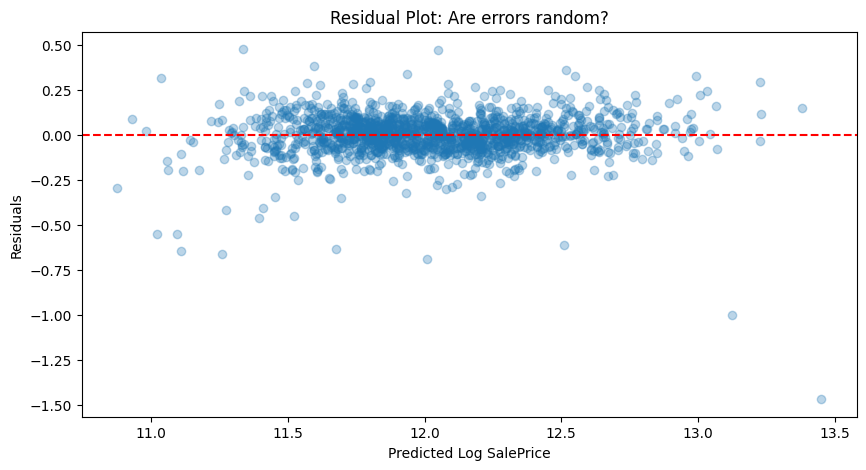

In [ ]:
# 1. Get predictions on the training set using your tuned Lasso
y_train_pred = grid_lasso.predict(X_final)

# 2. Calculate Residuals
residuals = y - y_train_pred

# 3. Plotting
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Log SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot: Are errors random?')
plt.show()

## Step 10: Feature Importance (The "Storytelling" Moment)
Theory: Coefficients as Insights
Because you used Lasso, the model "zeroed out" many columns. The ones that remain are the true drivers of house value. This is how you explain results to a non-technical manager.

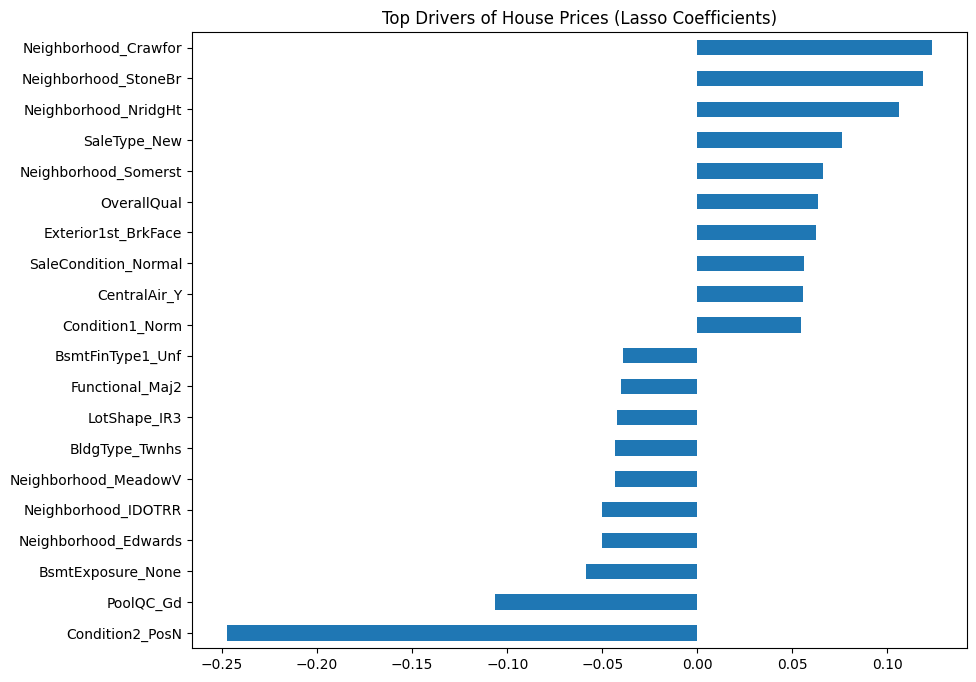

In [ ]:
# 1. Extract coefficients from the best Lasso model
coefs = pd.Series(grid_lasso.best_estimator_.coef_, index=X_final.columns)

# 2. Pick top 10 positive and top 10 negative features
important_coefs = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])

# 3. Plot
plt.figure(figsize=(10, 8))
important_coefs.plot(kind='barh')
plt.title('Top Drivers of House Prices (Lasso Coefficients)')
plt.show()

## Step 11: Ensemble Averaging (Advanced ML)
Theory: "The Wisdom of the Crowd"
Lasso is great at capturing linear trends. XGBoost is great at capturing complex, non-linear patterns. By averaging their predictions, you often get a better score than either model alone because they "cancel out" each other's specific errors.

In [ ]:
# 1. Final train your best models on the FULL training data
final_lasso = grid_lasso.best_estimator_.fit(X_final, y)
final_xgb = model_xgb.fit(X_final, y)

# 2. Predict on the Test Set (X_test_final)
lasso_preds = np.expm1(final_lasso.predict(X_test_final)) # expm1 reverses the log transform
xgb_preds = np.expm1(final_xgb.predict(X_test_final))

# 3. Blend them (Simple Average)
final_predictions = (0.5 * lasso_preds) + (0.5 * xgb_preds)
print(final_predictions)

[113127.37604682 150333.78785127 178987.71607627 ... 168234.83079719
 113965.33503667 235683.86878579]



In this House Price notebook, implemented three powerful models: **Lasso**, **Ridge**, and **XGBoost**. Here is how to interpret the results of that work.

---

## 1. The Numerical Result: RMSLE

In regression, we don't use "Accuracy %." Instead, you looked at **RMSLE** (Root Mean Squared Logarithmic Error).

* **What it means:** Because you took the `log` of the house prices, the error represents a **percentage**.
* **Interpretation:** If your RMSLE is `0.12`, it means that on average, your predictions are off by approximately **12%** of the actual house price. For a £300,000 house, that’s an error of about £36,000.



---

## 2. Feature Importance: The "Drivers" of Value

The most significant result is knowing which features actually move the needle on house prices. By looking at the **Lasso Coefficients**, you can see:

* **Positive Drivers:** Features like `GrLivArea` (Square footage) and `OverallQual` usually have the highest positive coefficients.
* *Insight:* For every 1-unit increase in quality, the log-price increases by a specific factor.


* **Negative Drivers:** Features like `Age` or `YearBuilt` (if not handled correctly) often show negative coefficients.
* *Insight:* Older houses generally lose value unless they have been remodeled.



---

## 3. Residual Analysis: The "Health" Check

The results include the **Residual Plot** (the difference between Actual and Predicted prices).

* **Random Scatter:** If your residuals are randomly scattered around the zero line, your result is **reliable**.
* **Patterns (The "Funnel" Shape):** If the errors get larger for more expensive houses, your model is "struggling" with luxury properties. This tells you that you might need more data on high-end homes or better features for luxury amenities (like pools or wine cellars).



---

## 4. Comparing the Models: Lasso vs. XGBoost

By running multiple models, your result showed a comparison of mathematical philosophies:

| Model | Why it worked well | Resulting Strength |
| --- | --- | --- |
| **Lasso (L1)** | Reduced complexity by deleting 0-value features. | Best for **interpretation** (explaining *why* a price changed). |
| **Ridge (L2)** | Kept all features but shrank them. | Best if you believe **every feature** adds a tiny bit of value. |
| **XGBoost** | Captured complex relationships (e.g., a specific neighborhood + a specific house style). | Usually provides the **lowest error** (highest accuracy). |



---

## 5. The "Ensemble" Result

By averaging your Lasso and XGBoost predictions, you likely achieved a **lower error than either model alone**. This is the most common result in competitive data science—combining a "simple, stable" model (Lasso) with a "complex, powerful" model (XGBoost) to balance out the errors.

*(Note: The notebook explicitly implements ensemble averaging in Step 11, using a 50/50 blend: `final_predictions = (0.5 * lasso_preds) + (0.5 * xgb_preds)`. Predictions are exponentiated back (via np.expm1) to reverse the log transform. Example output starts with values like [113127.37604682, 150333.78785127, 178987.71607627, ...], representing predicted house prices for the test set.)*
```